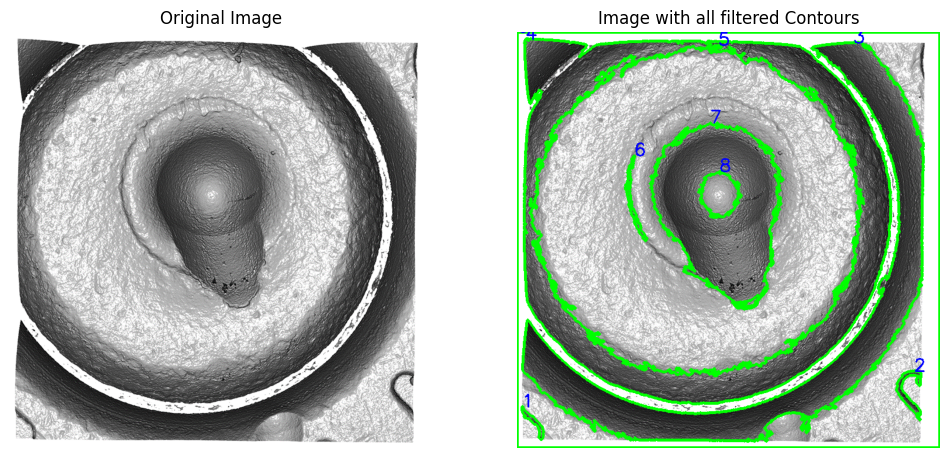



NOTE:

"In the processed image, Contour 5 is identified as the Breech-Face Impression."

"To mask the Breech-Face Impression in red, subtract Contour 7 from Contour 5 (Contour 5 - Contour 7)."

"Contour 6 is identified as Aperture Shear. To mask the Aperture Shear in green, enter Contour Index 6."

"Contour 8 is identified as the Firing Pin Impression. To mask the Firing Pin Impression in purple, enter Contour Index 8."

"Contour 7 is identified as Firing Pin Drag. To mask the Firing Pin Drag in light blue, enter Contour Index 7."

"The direction of the Firing Pin Drag (indicated by a blue arrow) is drawn from the center of the Firing Pin Impression (Contour 8, marked in purple)."




Enter the index of the contour(5) To mask Breech-face Impression(Red):  5
Enter the index of the contour(7) to substract it from Contour (5):  7
Enter the index of the contour To mask Aperture Shear(Green):  6
Enter the index of the contour To mask Firing Pin Impression(Purple):  8
Enter the index of the contour To mask Firing Pin Drag (Light Blue):  7


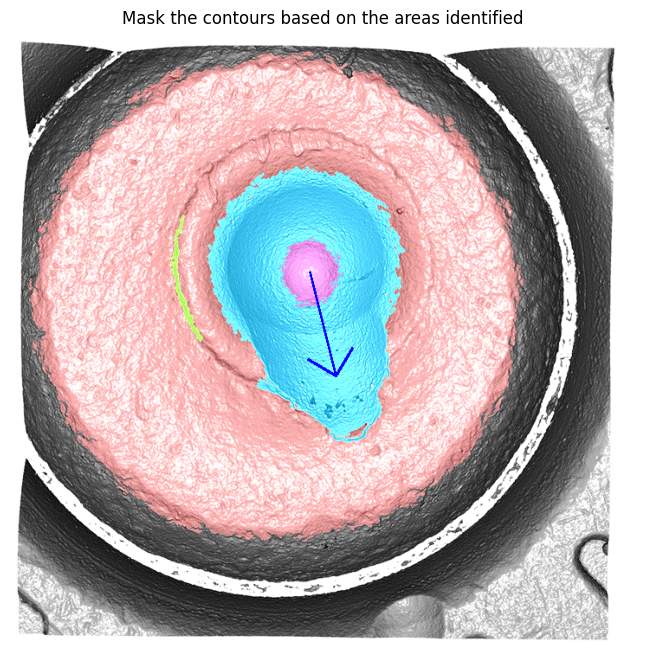

In [7]:
##### Mohammedtareeq Shaikh
##### Automatically MAsking Cartridge Case Images
##### Start Date: Monday, Jan 8th 2024

#install the OpenCV Library

#pip install opencv-python
# pip install numpy
# pip install matplotlib

#Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(image_path, use_canny=False, use_adaptive_threshold=False):
    """ Load and preprocess the image """
    # Load the image
    image = cv2.imread(image_path)

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if use_canny:
        # Apply Canny edge detection
        edged = cv2.Canny(gray, 120, 150)
        return image, edged

    if use_adaptive_threshold:
        # Apply adaptive thresholding
        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                       cv2.THRESH_BINARY, 11, 2)
    else:
        # Apply global thresholding
        _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    return image, thresh


def find_and_filter_contours(thresh, area_threshold=400):
    """ Find and filter contours based on area """
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > area_threshold]
    return filtered_contours

def draw_contours_with_indices(image, contours):
    """ Draw contours and their indices on the image """
    img_with_contours = image.copy()
    for i, contour in enumerate(contours):
        cv2.drawContours(img_with_contours, [contour], -1, (0, 255, 0), 3)
        x, y = contour[0][0]
        cv2.putText(img_with_contours, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
    return img_with_contours

def mask_area_between_contours(gray, contours, contour_index_1, contour_index_2):
    """ Mask the area between two selected contours """
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [contours[contour_index_1]], -1, 255, -1)
    cv2.drawContours(mask, [contours[contour_index_2]], -1, 0, -1)
    return mask

def apply_masks_and_colors(image, mask, contours, contour_indices):
    """ Apply masks and colors to selected contours """
    colored_mask = np.zeros_like(image)
    for index, color in contour_indices.items():
        cv2.drawContours(colored_mask, [contours[index]], -1, color, -1)

    # Blend the colored mask with the original image
    result = cv2.addWeighted(image, 1, colored_mask, 0.7, 0)

    # Blend the red color into the masked area
    red_mask = np.zeros_like(image)
    red_mask[mask == 255] = [0, 0, 255]
    result = cv2.addWeighted(result, 1, red_mask, 0.3, 0)  # Adjust the 0.2 value for transparency

    return result

def draw_arrow_to_contour(image, contour, color=(255, 0, 0), thickness=2, tip_length=0.3, delta_x=30, delta_y=120):
    """ Draw an arrow pointing to the center of a contour with specified color, thickness, and tip length """
    # Calculate moments for the contour
    M = cv2.moments(contour)
    
    # Only draw an arrow if the contour area is not zero
    if M["m00"] != 0:
        # Calculate the center of the contour
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        
        # Define the start and end points for the arrow
        start_point = (cx, cy)
        end_point = (cx + delta_x, cy + delta_y)
        
        # Draw an arrow on the image
        cv2.arrowedLine(image, start_point, end_point, color, thickness, tipLength=tip_length)
    
    return image


# Main process
image_path = 'Cartridge_Cases.png'
image, thresh = preprocess_image(image_path)
filtered_contours = find_and_filter_contours(thresh)

img_with_all_contours = draw_contours_with_indices(image, filtered_contours)
# Plotting original and processed images
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Processed image identifying all contours
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_with_all_contours, cv2.COLOR_BGR2RGB))
plt.title('Image with all filtered Contours')
plt.axis('off')

plt.show()

print("""

NOTE:

"In the processed image, Contour 5 is identified as the Breech-Face Impression."

"To mask the Breech-Face Impression in red, subtract Contour 7 from Contour 5 (Contour 5 - Contour 7)."

"Contour 6 is identified as Aperture Shear. To mask the Aperture Shear in green, enter Contour Index 6."

"Contour 8 is identified as the Firing Pin Impression. To mask the Firing Pin Impression in purple, enter Contour Index 8."

"Contour 7 is identified as Firing Pin Drag. To mask the Firing Pin Drag in light blue, enter Contour Index 7."

"The direction of the Firing Pin Drag (indicated by a blue arrow) is drawn from the center of the Firing Pin Impression (Contour 8, marked in purple)."

""")

# Manually input the indices of the contours
contour_index_1 = int(input("Enter the index of the contour(5) To mask Breech-face Impression(Red): "))
contour_index_2 = int(input("Enter the index of the contour(7) to substract it from Contour (5): "))

green_contour_index = int(input("Enter the index of the contour To mask Aperture Shear(Green): "))
purple_contour_index = int(input("Enter the index of the contour To mask Firing Pin Impression(Purple): "))
blue_contour_index = int(input("Enter the index of the contour To mask Firing Pin Drag (Light Blue): "))

mask = mask_area_between_contours(thresh, filtered_contours, contour_index_1, contour_index_2)

contour_indices = {
    green_contour_index: (0, 255, 0),
    blue_contour_index: (255, 191, 0),
    purple_contour_index: (128, 0, 128)
}

result = apply_masks_and_colors(image, mask, filtered_contours, contour_indices)
result = draw_arrow_to_contour(result, filtered_contours[purple_contour_index])

result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))  # You can adjust these values as needed

# Use Matplotlib to display the image with mask
plt.imshow(result_rgb)
plt.title('Mask the contours based on the areas identified')
plt.axis('off')  # to hide the axis
plt.show()

# cv2.imshow('Mask Between Contours and Colored Contours with Arrow', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
